# AI Hackathon Looking at the Boston Housing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg
from tqdm.notebook import tqdm


%matplotlib inline

In [2]:
df = pd.read_csv('boston_corrected.csv')

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

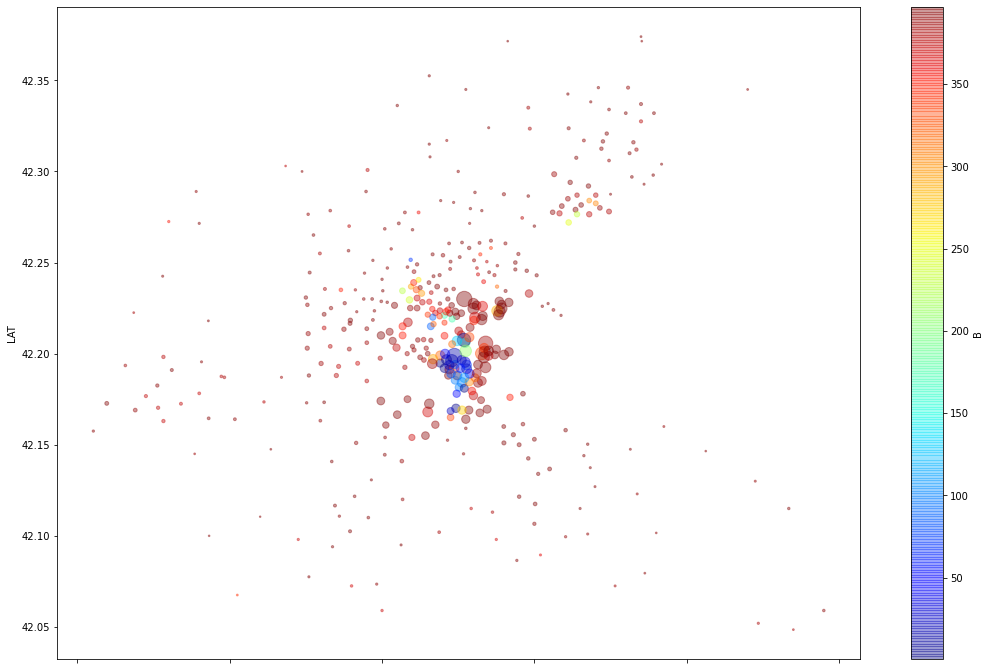

In [4]:
housing = train_set.copy()

cols_to_drop = ['MEDV']

housing = housing.drop(cols_to_drop, axis=1)

housing.plot(kind='scatter', x='LON', y='LAT', c='B',colormap='jet', alpha=0.4, figsize=(18,12), s=(housing['CRIM'] ** (1/2)) * 25)

In [5]:
import csv

def writeDict(d, fname):
    with open(fname, 'w') as f:  # You will need 'wb' mode in Python 2.x
        w = csv.DictWriter(f, d.keys())
        w.writeheader()
        w.writerow(d)

towns = set(df["TOWN"].values)

In [6]:
town_pop_1980 = {}
census_pop = pd.read_csv("boston_town_data.csv")

town_pop_1980["Boston East Boston"] = 51152*(1-0.371)
town_pop_1980["Boston Allston-Brighton"] = 15719*(1+0.3) + 51468 * (1-0.38)
town_pop_1980["Boston Mattapan"] = 23840*(1-0.42) 
town_pop_1980["Boston Roxbury"] = 101326*(1-0.57) 
town_pop_1980["Boston Downtown"] = 7174*(1+0.163)
town_pop_1980["Boston North End"] = 16087*(1-0.471)
town_pop_1980["Boston Dorchester"] = 162139*(1-0.325)
town_pop_1980["Boston Back Bay"] = 21228*(1-0.136)
town_pop_1980["Boston Hyde Park"] = 26128*(1+0.162)
town_pop_1980["Boston Charlestown"] = 31332*(1-0.573)
town_pop_1980["Boston West Roxbury"] = 27066*(1+0.158)
town_pop_1980["Boston Beacon Hill"] = 14277*(1-0.255)
town_pop_1980["Boston South Boston"] = 53463*(1-0.446)


for t in towns:
    
    #check if we have manually added it
    if((t in town_pop_1980) == False):
        #if we haven't try collect the data
        point = census_pop.loc[census_pop["Town"] == t]

        if(point.empty == False):
            #pass
            t_name = point["Town"].values[0]
            pop = float(point["1980"].values[0].replace(',', ''))
            town_pop_1980[t_name] = pop
        else:
            print("town ", t, " not present")

writeDict(town_pop_1980, "pop_1980.csv")

town  Boston Savin Hill  not present
town  Manchester  not present
town  Boston Forest Hills  not present
town  Sargus  not present


array([[<AxesSubplot:xlabel='CMEDV', ylabel='CMEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CMEDV'>,
        <AxesSubplot:xlabel='NOX', ylabel='CMEDV'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CMEDV'>],
       [<AxesSubplot:xlabel='CMEDV', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='NOX', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='INDUS', ylabel='PTRATIO'>],
       [<AxesSubplot:xlabel='CMEDV', ylabel='NOX'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='NOX'>,
        <AxesSubplot:xlabel='NOX', ylabel='NOX'>,
        <AxesSubplot:xlabel='INDUS', ylabel='NOX'>],
       [<AxesSubplot:xlabel='CMEDV', ylabel='INDUS'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='INDUS'>,
        <AxesSubplot:xlabel='NOX', ylabel='INDUS'>,
        <AxesSubplot:xlabel='INDUS', ylabel='INDUS'>]], dtype=object)

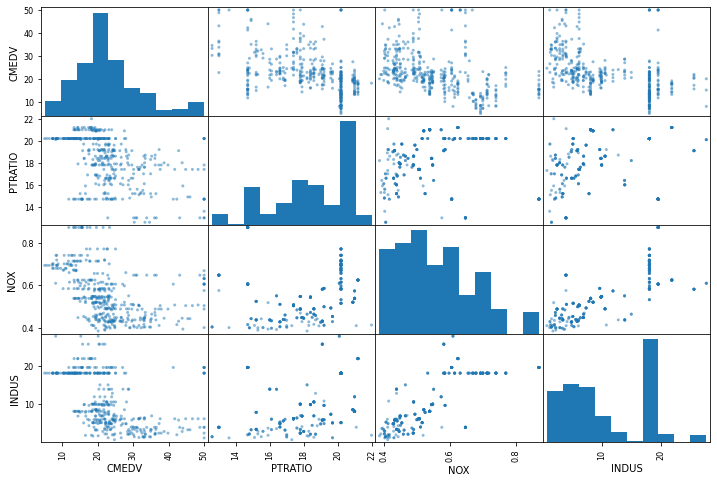

In [7]:
from pandas.plotting import scatter_matrix

attributes = [
    'CMEDV', 'PTRATIO',
    'NOX',
    'INDUS'
]
scatter_matrix(housing[attributes], figsize=(12, 8))

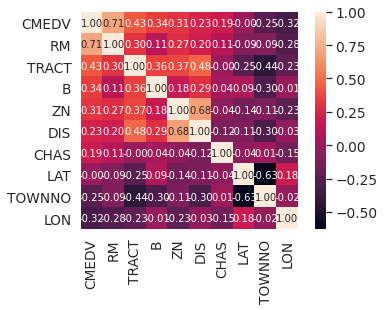

In [8]:
import seaborn as sns
k = 10
corr = housing.corr()
cols = corr.nlargest(k, 'CMEDV')['CMEDV'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
#Standard Python libraries for data and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Import error metric
from sklearn.metrics import mean_squared_error

#Import a dataset
from sklearn.datasets import load_boston

#Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Display charts in the notebook
%matplotlib inline

## Features to Keep

In [10]:
'''features_to_keep = ['CRIM', 'PTRATIO', 'NOX', 'INDUS', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'CHAS', 'DIS', 'B', 'LSTAT']

df = pd.read_csv('boston_corrected.csv')

pr_housing = train_set.copy()
pr_y = train_set['CMEDV'].copy()
pr_housing = pr_housing[features_to_keep]

y_clean = test_set['CMEDV'].copy()'''

"features_to_keep = ['CRIM', 'PTRATIO', 'NOX', 'INDUS', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'CHAS', 'DIS', 'B', 'LSTAT']\n\ndf = pd.read_csv('boston_corrected.csv')\n\npr_housing = train_set.copy()\npr_y = train_set['CMEDV'].copy()\npr_housing = pr_housing[features_to_keep]\n\ny_clean = test_set['CMEDV'].copy()"

(0.41895689562038996, 'RM'),
 (0.3860377920925765, 'LSTAT'),
 (0.060677238819973126, 'PTRATIO'),
 (0.0451390601054642, 'CRIM'),
 (0.025676305921677755, 'DIS'),
 
 (0.02249057951055056, 'NOX'),
 (0.016768304147548034, 'B'),
 (0.016568257720467418, 'TAX'),
 (0.006829425549138735, 'INDUS'),
 (0.0008561405122136707, 'ZN')

In [20]:
features_to_keep_2 = ['LON', 'LAT', 'CRIM']

df = pd.read_csv('boston_corrected.csv')

pr_housing = train_set.copy()
pr_y = train_set['CMEDV'].copy()
pr_housing = pr_housing[features_to_keep_2]

pr_housing_test = test_set.copy()
pr_y_test = test_set['CMEDV'].copy()
pr_housing_test = pr_housing_test[features_to_keep_2]

In [26]:
print(pr_housing_test)

         LON      LAT      CRIM
173 -71.0855  42.2450   0.09178
274 -71.1305  42.1675   0.05644
491 -71.0160  42.2382   0.10574
72  -71.1300  42.3050   0.09164
452 -71.0340  42.1790   5.09017
..       ...      ...       ...
412 -71.0470  42.2030  18.81100
436 -71.0455  42.1893  14.42080
411 -71.0487  42.2048  14.05070
86  -71.0330  42.3050   0.05188
75  -71.1000  42.2875   0.09512

[102 rows x 3 columns]


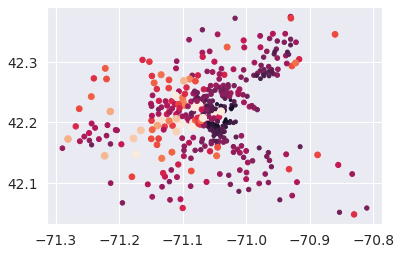

In [12]:
# Scatter Plot for Longitude and Latitude

x = train_set['LON'].copy()
y = train_set['LAT'].copy()
s = train_set['CMEDV'].copy()
c = train_set['TOWNNO'].copy()

plt.scatter(x, y, s, s)
plt.show()

In [21]:
y_preds = []
y_preds_test = []

mses_train = []
mses_test = []

degrees = range(1,30)
for degree in tqdm(degrees):

    ########################################################

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform X
    X_poly = poly_features.fit_transform(pr_housing)
    
    # Create a linear regression model and fit
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, pr_y)
    
    # Create predictions y_pred
    y_pred = lin_reg.predict(X_poly)
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    
    X_poly_test = poly_features.fit_transform(pr_housing_test)
    
    # Create predictions y_pred
    y_pred_test = lin_reg.predict(X_poly_test)
    
    y_preds_test.append(y_pred_test)
    mses_test.append(mean_squared_error(pr_y_test, y_pred_test))
    
    ########################################################    
    
    #Please do not change code below
    y_preds.append(y_pred)
    mses_train.append(mean_squared_error(pr_y, y_pred))

  0%|          | 0/29 [00:00<?, ?it/s]

On the test set the lowest MSE comes from a polynomial of degree: 3
Min test MSE:  43.196057528586756


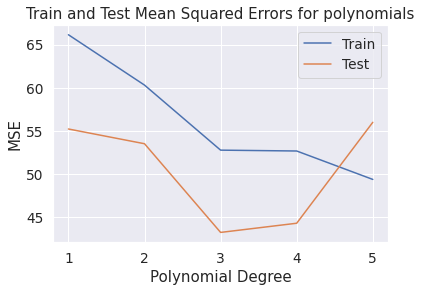

In [25]:
deg = 5
degrees = degrees[0:deg]
mses_train = mses_train[0:deg]
mses_test = mses_test[0:deg]

plt.plot(degrees,mses_train,label="Train")
plt.plot(degrees,mses_test,label="Test")
plt.ylabel("MSE")
plt.xlabel("Polynomial Degree")
plt.legend()
plt.title("Train and Test Mean Squared Errors for polynomials")
print('On the test set the lowest MSE comes from a polynomial of degree:',np.argmin(np.array(mses_test))+1)
print('Min test MSE: ',np.min(np.array(mses_test)))

# Plots with the Longitude and Latitude

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lon = df['LON']
lat = df['LAT']

In [ ]:
def Plot3D_Surface(attribute):
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(lon, lat, df[attribute], c=df[attribute], cmap='binary')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [ ]:
Plot3D_Surface('CMEDV')

# Neural Networks

In [41]:
features_to_keep = ['LON', 'LAT']

df = pd.read_csv('boston_corrected.csv')


from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

######



######

classifier = 'CMEDV'

pr_housing = train_set.copy()

X_train = pr_housing[features_to_keep]
y_train = pr_housing[classifier]

######

pr_housing_test = test_set.copy()

X_test = pr_housing_test[features_to_keep]
y_test = pr_housing_test[classifier]

In [54]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)

'''
# Classifying data into bins

n_bins = 20

for i in range(1,len(y_train)+1):
    for threshold in range(n_bins):
        if y_train[i] < (threshold*pd.DataFrame.max(y_train)/n_bins):
            y_train.app
        else:
            pass
            
'''

<ipython-input-54-3e883f3299e5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = threshold


KeyError: 2

In [56]:
print(y_train)

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: CMEDV, Length: 404, dtype: float64


In [43]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

# K-Nearest Neighbours

In [57]:
features_to_keep = ['LON', 'LAT']

df = pd.read_csv('boston_corrected.csv')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

classifier = 'CMEDV'

pr_housing = train_set.copy()

X_train = pr_housing[features_to_keep]
y_train = pr_housing[classifier]

######

pr_housing_test = test_set.copy()

X_test = pr_housing_test[features_to_keep]
y_test = pr_housing_test[classifier]


from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
boston_model = DecisionTreeRegressor(random_state=1)

# Fit model
boston_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [59]:
y_pred = boston_model.predict(X_train)
y_pred_test = boston_model.predict(X_test)

In [ ]:
plt.plot(degrees,mses_train,label="Train")
plt.plot(degrees,mses_test,label="Test")
plt.ylabel("MSE")
plt.xlabel("Polynomial Degree")
plt.legend()
plt.title("Train and Test Mean Squared Errors for polynomials")
print('On the test set the lowest MSE comes from a polynomial of degree:',np.argmin(np.array(mses_test))+1)
print('Min test MSE: ',np.min(np.array(mses_test)))